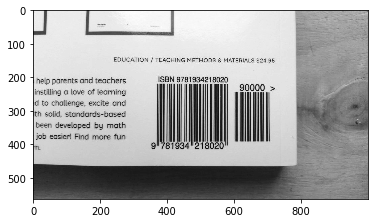

In [5]:
#꼭지점 정보 갖고 오기_pyzbar쓰는.ver
import pyzbar.pyzbar as pyzbar
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('ISBN.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray,cmap='gray') #컬러맵을 gray scale로 바꿈

In [6]:
decoded = pyzbar.decode(gray)

decoded

[Decoded(data=b'9781934218020', type='EAN13', rect=Rect(left=370, top=219, width=211, height=172), polygon=[Point(x=370, y=309), Point(x=370, y=391), Point(x=472, y=391), Point(x=581, y=390), Point(x=581, y=220), Point(x=371, y=219)])]

In [12]:
for d in decoded:
    print(d.data)

b'9781934218020'


In [29]:
ISBN = d.data.decode()
ISBN

'9781934218020'

In [30]:
import os
import sys
import urllib.request
import datetime
import time
import json

In [31]:
# [CODE 1]

def get_request_url(url):
    print(">get_request_url()")
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

In [32]:
# [CODE 2]

def getNaverSearchResult(sNode, search_text, page_start, display):
    print(">getNaverSearchResult()")
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % sNode
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(search_text), page_start, display)
    url = base + node + parameters

    retData = get_request_url(url)

    if (retData == None):
        return None
    else:
        return json.loads(retData)

In [33]:
# [CODE 3]

def getPostData(post, jsonResult):
    print(">getPostData()")

    title = post['title']
    image = post['image']
    author = post['author']
    price = post['price']
    discount = post['discount']
    publisher = post['publisher']
    description = post['description']
    pubdate = post['pubdate']

    # Tue, 14 Feb 2017 18:46:00 +0900

    jsonResult.append({'title': title, 'image': image, 'author': author, 'publisher': publisher,
                       'price': price, 'discount': discount, 'description': description, 'pubdate': pubdate})
    return

In [34]:
def isbnSearch(isbn):
    print(">main()")
    jsonResult = []

    # 'news', 'blog', 'cafearticle'

    sNode = 'book'

    search_text = isbn
    display_count = 100

    jsonSearch = getNaverSearchResult(sNode, search_text, 1, display_count)

    while ((jsonSearch != None) and (jsonSearch['display'] != 0)):
        for post in jsonSearch['items']:
            getPostData(post, jsonResult)

        nStart = jsonSearch['start'] + jsonSearch['display']
        jsonSearch = getNaverSearchResult(sNode, search_text, nStart, display_count)

    with open('%s_naver_%s.json' % (search_text, sNode), 'w', encoding='utf8') as outfile:
        retJson = json.dumps(jsonResult,
                             indent=4, sort_keys=True,
                             ensure_ascii=False)
        outfile.write(retJson)

    print('%s_naver_%s.json SAVED' % (search_text, sNode))

In [35]:
client_id = "8D2K86C4CHALYlPkI6Jx"
client_secret = "DaMxMtHnrD"
isbn = ISBN
isbnSearch(isbn)

>main()
>getNaverSearchResult()
>get_request_url()
[2019-11-28 00:55:24.456452] Url Request Success
9781934218020_naver_book.json SAVED
